
Algoritmo SVR (Suport Vector Regression)
Para interpolar datos
Se encuentra una función (esto eslo que hace)



In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")

Los mismo dateos que la clase 4 (los de los contaminantes)

In [4]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


Usaremos más paqueterias

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

AHora vamos a escoger los datos que necesitamos, así comoa las variables dependientes e independientes

In [21]:
X= data[['NO', 'PM25']] #variable indepemdiente
y= data['PM10'] #variable dependiente

In [22]:
split_index = int(len(data)*0.8)
X_train= X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train= y.iloc[:split_index]
y_test= y.iloc[split_index:]

Se deben a escalar los valores

In [23]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

Ahora llamara al algoritmo y se debe entrenar

In [24]:
svr_model= SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled,y_train)

SVR()

In [25]:
y_test_pred= svr_model.predict(X_test_scaled)

In [26]:
test_mse= mean_squared_error(y_test, y_test_pred)
test_r2= r2_score(y_test, y_test_pred)

In [27]:
test_mse

63.310573032474885

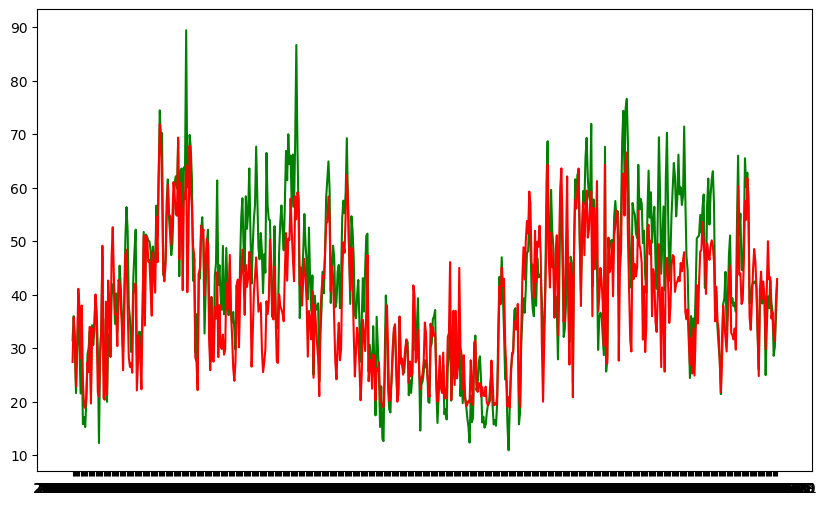

In [29]:
plt.figure(figsize=(10,6))
plt.plot(data.iloc[split_index:]['fecha'],y_test, label='valores reales', color='green')
plt.plot(data.iloc[split_index:]['fecha'],y_test_pred, label='predicciones', color='red')


Le podemos poner etiquetas a los ejes

Text(0, 0.5, 'PM10')

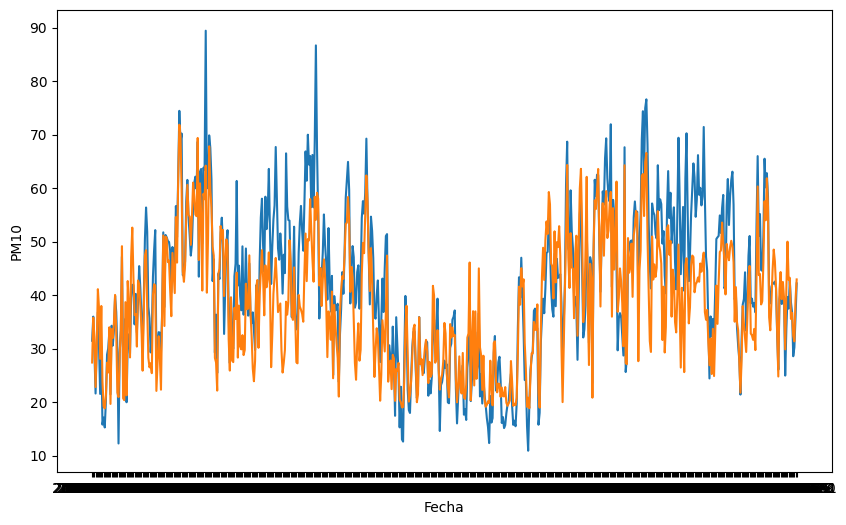

In [30]:
plt.figure(figsize=(10,6))
plt.plot(data.iloc[split_index:]['fecha'],y_test)
plt.plot(data.iloc[split_index:]['fecha'],y_test_pred)
plt.xlabel('Fecha')
plt.ylabel('PM10')

Podemos acomodar las fechas para que no se vean todas amontonada

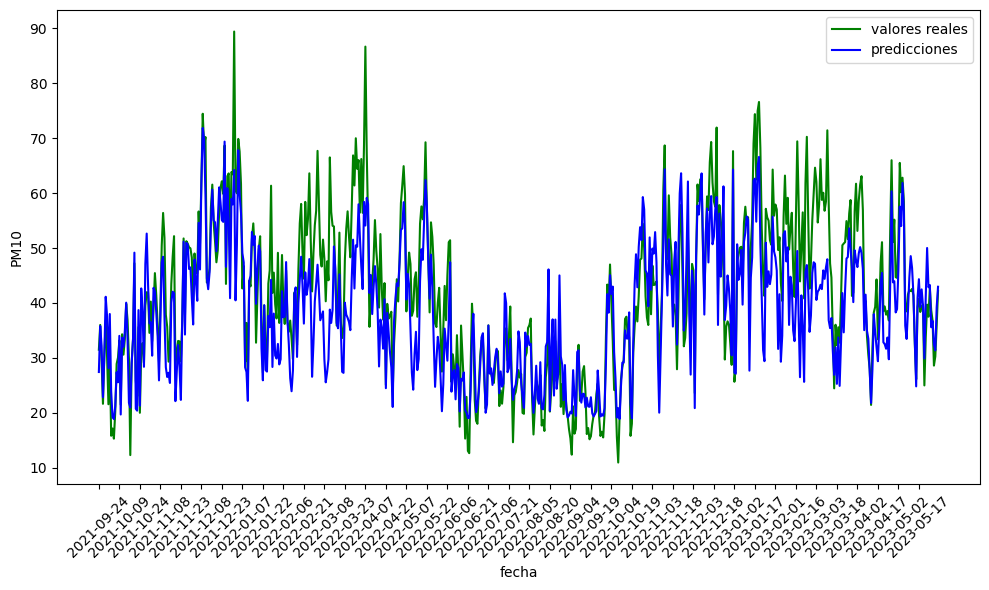

In [33]:
plt.figure(figsize=(10,6))
plt.plot(data.iloc[split_index:]['fecha'],y_test, label='valores reales', color='green')
plt.plot(data.iloc[split_index:]['fecha'],y_test_pred, label='predicciones', color='blue')
plt.xlabel('fecha')
plt.ylabel('PM10')
plt.legend()

plt.xticks(data.iloc[split_index:]['fecha'][::15], rotation=45)
plt.tight_layout()
plt.show()

También podemos hacer una grafica de dispersión

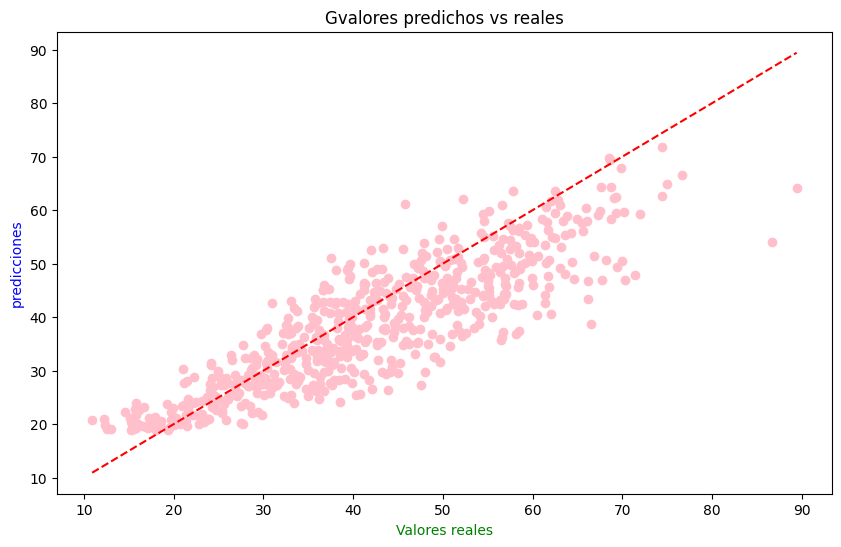

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred, color='pink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label= 'linea ideal') #hace la linea punteada
plt.xlabel('Valores reales', color= 'green')
plt.ylabel('predicciones', color= 'blue')
plt.title('Gvalores predichos vs reales')
plt.show()

Creamos columna
```
# Esto tiene formato de código
```



In [44]:
data['fecha'] = pd.to_datetime(data['fecha'])

Creamos una nueva columna llamada "mes"

In [45]:
data['mes']=data['fecha'].dt.month

Lo mismo para día

In [46]:
data['día']=data['fecha'].dt.day

In [50]:
data['día_de_semana']=data['fecha'].dt.dayofweek

ponemos >= 5 porque python cuenta desde el 0

In [51]:
data['fin_de_semana']=(data['fecha'].dt.dayofweek>=5).astype(int)

In [52]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,mes,día,día_de_semana,fin_de_semana
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,1,1,3,0
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,1,2,4,0
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,1,3,5,1
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,1,4,6,1
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683,5,27,5,1
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658,5,28,6,1
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588,5,29,0,0
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818,5,30,1,0


Primeras 25 filas

In [53]:
data.head(25)

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,mes,día,día_de_semana,fin_de_semana
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,1,1,3,0
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,1,2,4,0
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,1,3,5,1
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,1,4,6,1
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,1,5,0,0
5,2015-01-06,0.748952,27.977346,23.242718,51.213592,12.902256,40.321608,21.113712,4.024024,1,6,1,0
6,2015-01-07,0.443254,11.297114,16.259762,27.594228,17.055130,30.054598,10.737643,2.192547,1,7,2,0
7,2015-01-08,0.533528,10.527586,21.625862,32.155172,19.150555,33.313953,14.501946,1.962233,1,8,3,0
8,2015-01-09,1.094574,41.795181,32.526678,74.283993,19.482813,55.188679,29.085106,2.781046,1,9,4,0
9,2015-01-10,0.770722,23.455717,27.468599,50.919485,22.689552,39.798507,24.071895,2.559006,1,10,5,1


SELECCIÓN DE CARACTERÍSTICAS
Para hacer la predicción de alguna variable objetivo

In [54]:
from sklearn.feature_selection import SelectKBest, f_regression

drop quita columnas

In [55]:
X=data.drop(columns=['fecha','PM10'])

In [56]:
X

,CO,NO,NO2,NOX,O3,PM25,SO2,mes,día,día_de_semana,fin_de_semana
0,1.050696,22.765528,24.225155,46.987578,23.175150,78.953405,11.554723,1,1,3,0
1,0.807585,32.249608,21.554160,53.800628,17.268366,15.449438,1.895052,1,2,4,0
2,0.640755,21.686916,19.394081,41.071651,15.486486,12.915129,1.436937,1,3,5,1
3,0.726940,24.606272,19.560976,44.165505,17.329032,16.838284,1.809061,1,4,6,1
4,0.530815,11.443182,20.990260,32.439935,14.470588,12.667774,8.315789,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3068,0.256722,3.750583,17.284351,21.629371,41.580645,21.170139,2.735683,5,27,5,1
3069,0.286826,3.458886,16.349241,20.230769,36.913761,18.454861,2.331658,5,28,6,1
3070,0.482077,11.448113,24.521154,36.436321,29.697068,16.692857,1.071588,5,29,0,0
3071,0.441455,13.893519,22.615530,37.224537,36.185971,20.888525,1.181818,5,30,1,0


In [57]:
y=data['PM10']

In [58]:
y

,PM10
0,105.573684
1,36.687845
2,29.269022
3,39.961538
4,31.855643
...,...
3068,36.774011
3069,28.580000
3070,30.241486
3071,35.859532


In [67]:
selectro= SelectKBest(score_func=f_regression, k=8) #k son las características
X_selected= selectro.fit_transform(X,y) # es para seleccionar las caracteísticas que me dan la mejor función
selected_features= X.columns[selectro.get_support()]

In [62]:
X_selected

array([[ 1.05069583, 22.76552795, 24.22515528, 46.98757764, 78.95340502],
       [ 0.80758483, 32.24960754, 21.55416013, 53.80062794, 15.4494382 ],
       [ 0.64075547, 21.68691589, 19.394081  , 41.07165109, 12.91512915],
       ...,
       [ 0.48207721, 11.44811321, 24.52115385, 36.43632075, 16.69285714],
       [ 0.44145455, 13.89351852, 22.6155303 , 37.22453704, 20.88852459],
       [ 0.34040367,  5.35306554, 19.37258348, 25.71035941, 24.78709677]])

Y las variables que más influyen en la predicción serán las siguientes

In [68]:
selected_features

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM25', 'SO2', 'mes'], dtype='object')

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rf_model= RandomForestRegressor( random_state=42)

Ahora se aplica el Random Forest

In [71]:
rf_model.fit(X_selected,y)

RandomForestRegressor(random_state=42)

Ahora si
¿quienes son la características más importantes?

In [87]:
importancia_df=pd.DataFrame({'Caracteristica': X.columns,'Importancia': rf_model.feature_importances_}).sort_values(by='Importancia')

ValueError: All arrays must be of the same length

In [84]:
importancia_df=pd.DataFrame({'Caracteristica':X.columns,
                             'Importancia': rf_model.feature_importances_}).sort_values(by='Importancia')

ValueError: All arrays must be of the same length

In [86]:
redmet=pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/redmet_2023_05.csv")

In [88]:
redmet['fecha']=pd.to_datetime(redmet['fecha'])

In [89]:
redmet

,fecha,RH,TMP,WDR,WSP
0,2015-01-01,60.565476,13.385714,156.723039,1.933333
1,2015-01-02,52.452381,13.567262,176.710784,2.559804
2,2015-01-03,55.763636,13.893333,190.830846,2.136318
3,2015-01-04,62.776786,12.536012,196.306373,2.592647
4,2015-01-05,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...
3068,2023-05-27,51.899130,19.453565,190.198664,2.187646
3069,2023-05-28,59.949565,17.375826,183.542571,2.092154
3070,2023-05-29,58.837743,17.039153,169.527919,1.952284
3071,2023-05-30,50.145719,18.684699,184.998255,1.978709


In [90]:
data['fecha']=pd.to_datetime(data['fecha'])

Vamos a unir los datos

In [91]:
union=pd.merge(data, redmet, on='fecha', how='inner')

In [92]:
union

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,mes,día,día_de_semana,fin_de_semana,RH,TMP,WDR,WSP
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,1,1,3,0,60.565476,13.385714,156.723039,1.933333
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,1,2,4,0,52.452381,13.567262,176.710784,2.559804
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,1,3,5,1,55.763636,13.893333,190.830846,2.136318
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,1,4,6,1,62.776786,12.536012,196.306373,2.592647
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,1,5,0,0,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683,5,27,5,1,51.899130,19.453565,190.198664,2.187646
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658,5,28,6,1,59.949565,17.375826,183.542571,2.092154
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588,5,29,0,0,58.837743,17.039153,169.527919,1.952284
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818,5,30,1,0,50.145719,18.684699,184.998255,1.978709
